<a href="https://colab.research.google.com/github/rifkaarinda260204/UAS_AI/blob/main/RIfka_Arinda_Rahma_STI202303304_MEDICAL_INSURANCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ================================
# UTS Data Mining - Preprocessing
# Dataset: medical_insurance.csv (dari archive (3).zip)
# Jalankan di Jupyter / Colab
# ================================

# 0) Packages
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()


Saving archive (3).zip to archive (3) (2).zip


In [3]:
zip_path = "/content/archive (3).zip"


In [4]:
import zipfile, os

extract_dir = "/content/extracted_dataset"
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as z:
    print("Files in zip:", z.namelist())
    z.extractall(path=extract_dir)


Files in zip: ['medical_insurance.csv']


In [5]:
import pandas as pd

csv_path = os.path.join(extract_dir, "medical_insurance.csv")
df = pd.read_csv(csv_path)
df.head()


,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


In [6]:
# 4️⃣ Eksplorasi Awal
# ===============================================
print("\nTipe Data:")
display(df.dtypes)

print("\nJumlah Missing Values:")
display(df.isna().sum())

print("\nStatistik Numerik:")
display(df.describe().T)


Tipe Data:


,0
person_id,int64
age,int64
sex,object
region,object
urban_rural,object
income,float64
education,object
marital_status,object
employment_status,object
household_size,int64



Jumlah Missing Values:


,0
person_id,0
age,0
sex,0
region,0
urban_rural,0
income,0
education,0
marital_status,0
employment_status,0
household_size,0



Statistik Numerik:


,count,mean,std,min,25%,50%,75%,max
person_id,100000.0,50000.500000,28867.657797,1.00,25000.7500,50000.5000,75000.2500,100000.00
age,100000.0,47.521500,15.988752,0.00,37.0000,48.0000,58.0000,100.00
income,100000.0,49873.905000,46800.214127,1100.00,21100.0000,36200.0000,62200.0000,1061800.00
household_size,100000.0,2.430900,1.075126,1.00,2.0000,2.0000,3.0000,9.00
dependents,100000.0,0.898380,0.950654,0.00,0.0000,1.0000,1.0000,7.00
bmi,100000.0,26.990512,4.994883,12.00,23.6000,27.0000,30.4000,50.40
visits_last_year,100000.0,1.927650,1.737730,0.00,1.0000,2.0000,3.0000,25.00
hospitalizations_last_3yrs,100000.0,0.093640,0.304848,0.00,0.0000,0.0000,0.0000,3.00
days_hospitalized_last_3yrs,100000.0,0.373350,1.373011,0.00,0.0000,0.0000,0.0000,21.00
medication_count,100000.0,1.236320,1.209358,0.00,0.0000,1.0000,2.0000,11.00


In [7]:
# Deteksi kolom kategorikal
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nKolom Kategorikal:", cat_cols)
print("Kolom Numerik:", num_cols)


Kolom Kategorikal: ['sex', 'region', 'urban_rural', 'education', 'marital_status', 'employment_status', 'smoker', 'alcohol_freq', 'plan_type', 'network_tier']
Kolom Numerik: ['person_id', 'age', 'income', 'household_size', 'dependents', 'bmi', 'visits_last_year', 'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs', 'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c', 'deductible', 'copay', 'policy_term_years', 'policy_changes_last_2yrs', 'provider_quality', 'risk_score', 'annual_medical_cost', 'annual_premium', 'monthly_premium', 'claims_count', 'avg_claim_amount', 'total_claims_paid', 'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd', 'cardiovascular_disease', 'cancer_history', 'kidney_disease', 'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count', 'proc_surgery_count', 'proc_physio_count', 'proc_consult_count', 'proc_lab_count', 'is_high_risk', 'had_major_procedure']


In [8]:
# 5️⃣ Penanganan Missing Values
# ===============================================
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
print("Missing Values sesudah imputasi:", df.isna().sum().sum())

Missing Values sesudah imputasi: 0


In [9]:
# 6️⃣ Deteksi dan Penanganan Outlier
# ===============================================
outlier_info = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
    outlier_info[col] = outlier_count
outlier_df = pd.DataFrame.from_dict(outlier_info, orient='index', columns=['outlier_count'])
display(outlier_df.sort_values('outlier_count', ascending=False))

,outlier_count
hypertension,20345
had_major_procedure,16970
mental_health,13014
proc_surgery_count,12519
arthritis,10831
days_hospitalized_last_3yrs,8969
hospitalizations_last_3yrs,8969
diabetes,8593
hba1c,7465
total_claims_paid,6963


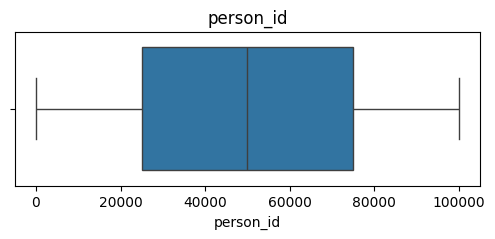

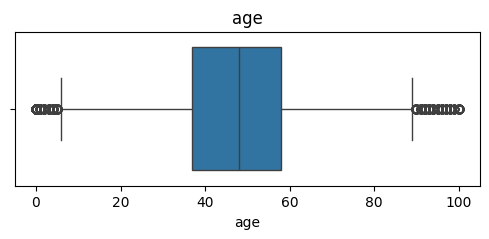

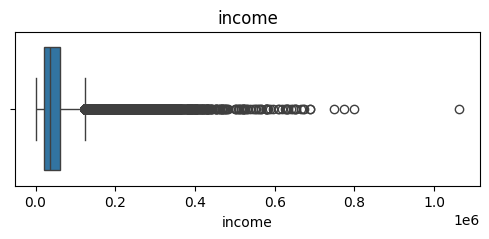

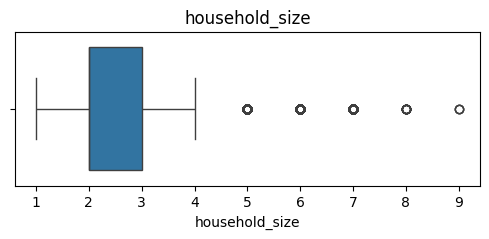

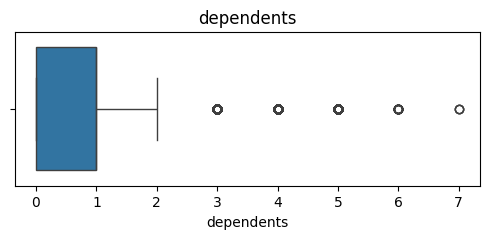

In [10]:
# Visualisasi contoh boxplot
for col in num_cols[:5]:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

In [11]:
# Log-transform kolom yang sangat skew
skewness = df[num_cols].skew().sort_values(ascending=False)
to_log = skewness[abs(skewness) > 1].index.tolist()
for col in to_log:
    if (df[col] >= 0).all():
        df[f"{col}_log"] = np.log1p(df[col])
print("Kolom dengan log-transform:", to_log)

Kolom dengan log-transform: ['kidney_disease', 'liver_disease', 'cancer_history', 'copd', 'total_claims_paid', 'avg_claim_amount', 'policy_changes_last_2yrs', 'annual_premium', 'monthly_premium', 'days_hospitalized_last_3yrs', 'cardiovascular_disease', 'annual_medical_cost', 'asthma', 'proc_surgery_count', 'income', 'hospitalizations_last_3yrs', 'diabetes', 'hba1c', 'arthritis', 'deductible', 'mental_health', 'claims_count', 'had_major_procedure', 'proc_consult_count', 'proc_lab_count', 'proc_imaging_count', 'proc_physio_count', 'visits_last_year', 'hypertension', 'copay', 'medication_count', 'dependents']


In [12]:
# 7️⃣ Transformasi & Reduksi
# ===============================================
# Tentukan target (ubah sesuai datasetmu)
target_col = 'is_high_risk' if 'is_high_risk' in df.columns else None
if target_col:
    y = df[target_col]
    X = df.drop(columns=[target_col])
else:
    X = df.copy()
    y = None

In [13]:
# Perbarui kolom numerik & kategorikal
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()


In [14]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])


In [15]:
# Jalankan transformasi
X_prep = preprocessor.fit_transform(X)
print("Shape setelah preprocessing:", X_prep.shape)

Shape setelah preprocessing: (100000, 114)


In [16]:
# 8️⃣ (Opsional) PCA & Feature Selection
# ===============================================
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_prep)
print("Setelah PCA (95% var):", X_pca.shape)

if y is not None:
    skb = SelectKBest(score_func=f_classif, k=min(30, X_prep.shape[1]))
    X_kbest = skb.fit_transform(X_prep, y)
    print("Setelah SelectKBest:", X_kbest.shape)

Setelah PCA (95% var): (100000, 46)
Setelah SelectKBest: (100000, 30)


In [17]:
# 9️⃣ Split Data & Simpan Hasil
# ===============================================
if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.2, random_state=42, stratify=y)
    print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (80000, 114) Test: (20000, 114)


In [18]:
# Simpan dataset hasil preprocessing
df.to_csv("/content/medical_insurance_processed.csv", index=False)
print("Dataset hasil preprocessing disimpan ke: /content/medical_insurance_processed.csv")

Dataset hasil preprocessing disimpan ke: /content/medical_insurance_processed.csv


In [19]:
# Simpan pipeline preprocessor
import joblib   # ← tambahkan baris ini
joblib.dump(preprocessor, "/content/preprocessor.joblib")
print("Pipeline preprocessor disimpan ke: /content/preprocessor.joblib")

print("\n✅ Preprocessing selesai tanpa error!")

Pipeline preprocessor disimpan ke: /content/preprocessor.joblib

✅ Preprocessing selesai tanpa error!
